In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
dataset = pd.read_csv('../data/dataset.csv')
dataset.head()

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,...,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_135,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0
2,1.0,2.0,2.0,2.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_203,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467832 entries, 0 to 1467831
Data columns (total 63 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   total_sessions_day0         1466467 non-null  float64
 1   total_sessions_day1         1466465 non-null  float64
 2   total_sessions_day3         1466464 non-null  float64
 3   total_sessions_day7         1466458 non-null  float64
 4   chapters_finished_day0      1467832 non-null  int64  
 5   chapters_finished_day1      1467832 non-null  int64  
 6   chapters_finished_day3      1467832 non-null  int64  
 7   chapters_finished_day7      1467832 non-null  int64  
 8   chapters_opened_day0        1467832 non-null  int64  
 9   chapters_opened_day1        1467832 non-null  int64  
 10  chapters_opened_day3        1467832 non-null  int64  
 11  chapters_opened_day7        1467832 non-null  int64  
 12  chapters_closed_day0        1467832 non-null  int64  
 1

In [20]:
dataset.isnull().sum()

total_sessions_day0       1365
total_sessions_day1       1367
total_sessions_day3       1368
total_sessions_day7       1374
chapters_finished_day0       0
                          ... 
platform                     0
target_sub_ltv_day30         0
target_iap_ltv_day30         0
target_ad_ltv_day30          0
target_full_ltv_day30        0
Length: 63, dtype: int64

In [26]:
columnsWithNaNs = ['total_sessions_day0', 'total_sessions_day1', 'total_sessions_day3', 'total_sessions_day7']
dataset[columnsWithNaNs] = dataset[columnsWithNaNs].fillna(dataset[columnsWithNaNs].mean())
# or better to replace with 0?
dataset.isnull().sum()

total_sessions_day0       0
total_sessions_day1       0
total_sessions_day3       0
total_sessions_day7       0
chapters_finished_day0    0
                         ..
platform                  0
target_sub_ltv_day30      0
target_iap_ltv_day30      0
target_ad_ltv_day30       0
target_full_ltv_day30     0
Length: 63, dtype: int64

Почнімо з media_source - це закодоване джерело трафіку, з якого прийшов користувач (Facebook, Google тощо); Спробуємо з'язувати з яких media_source ми отримуємо найбільше прибутку.


In [22]:
mediaSourceData = dataset[['target_full_ltv_day30', 'media_source']]\
    .groupby(['media_source'], group_keys=True)\
    .sum()
mediaSourceData.sort_values(by=['target_full_ltv_day30'], ascending=False)

,target_full_ltv_day30
media_source,
SOURCE_17,178081.217393
SOURCE_23,88381.038661
SOURCE_4,58684.510253
SOURCE_1,11350.813876
SOURCE_2,9140.568484
SOURCE_10,8457.155253
SOURCE_5,7016.308524
SOURCE_6,6402.577282
SOURCE_18,2293.067194


Наступним кроком з'ясуємо, яка платформа принесла нам найбільший заробіток

In [23]:
platformData = dataset[['target_full_ltv_day30', 'platform']]\
    .groupby(['platform'], group_keys=True)\
    .sum()
platformData.sort_values(by=['target_full_ltv_day30'], ascending=False)

,target_full_ltv_day30
platform,
ios,288943.060867
android,88103.127418


In [24]:
# прибуток щоденно від користувачів протягом кожного дня
calendarData = dataset[['install_date', 'target_full_ltv_day30']]\
    .groupby(['install_date'], group_keys=True)\
    .sum()
calendarData

,target_full_ltv_day30
install_date,
2021-12-01,4037.087482
2021-12-02,4130.755241
2021-12-03,3204.499475
2021-12-04,3800.636048
2021-12-05,3936.646668
...,...
2022-01-27,4457.286218
2022-01-28,4121.477517
2022-01-29,3599.604066


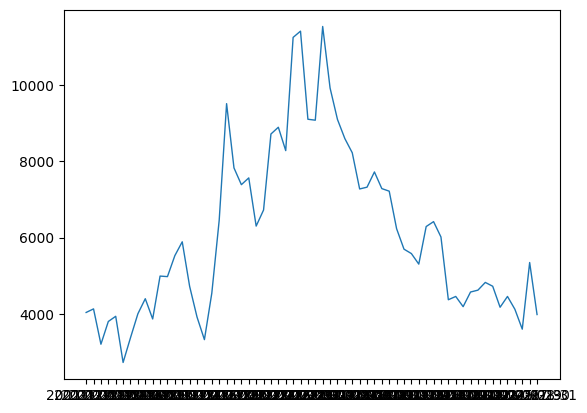

In [27]:
plt.plot(calendarData, linewidth=1, markersize=12)
plt.show()

Можна побачити, що ріст прибутку був в кінці першого місяця і на початку другого

Як валюта (кристали і тікети) впливає на прибуток? Чи правда, що люди, які к